This notebook contains all relevant code to visualize both datasets.

In [22]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import pickle
import os
import matplotlib.pyplot as plt
import re
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import shapiro
from pyampute.exploration.mcar_statistical_tests import MCARTest
import src.dataHandling.cleaningUtils as clean
from sklearn.preprocessing import StandardScaler

# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })

In [23]:
# Load data
try:
    with open("data/static_16_12_23/raw/static_full.pkl", "rb") as f:
        df_raw = pickle.load(f)
    with open("data/static_16_12_23/processed/merged_ohc/train_static.pkl", "rb") as f:
        df_merged_ohc = pickle.load(f)
    with open("data/static_16_12_23/processed/merged_only/train_static.pkl", "rb") as f:
        df_merged_only = pickle.load(f)
except FileNotFoundError:
    os.chdir('../')
    with open("data/static_16_12_23/raw/static_full.pkl", "rb") as f:
        df_raw = pickle.load(f)
    with open("data/static_16_12_23/processed/merged_ohc/train_static.pkl", "rb") as f:
        df_merged = pickle.load(f)
    with open("data/static_16_12_23/processed/merged_only/train_static.pkl", "rb") as f:
        df_merged_only = pickle.load(f)

In [24]:
df = df_raw.copy()

In [25]:
df.head()

,gameDuration,gameCreation,gameVersion,mapId,queueId,patch,seasonId,platformId,participant1_level,participant1_champion_championNumber,...,participant10_kills,participant10_deaths,participant10_assists,participant10_lp,participant10_maxKills,participant10_cs,participant10_damage,participant10_gold,participant10_teamId,participant10_win
0,1157,1697021737080,13.20.535.2535,11,420,20,13,BR1,988,83,...,1.4,6.5,14.7,13,12,35.8,7711.0,7655.0,200,True
0,1770,1697028305954,13.20.535.2535,11,420,20,13,BR1,121,150,...,1.5,4.4,14.6,59,12,35.2,6091.0,7358.0,200,True
0,2308,1697031146651,13.20.535.2535,11,420,20,13,BR1,739,164,...,2.0,4.7,12.3,109,10,35.7,9140.0,7780.0,200,True
0,1838,1697030634954,13.20.535.2535,11,420,20,13,BR1,841,54,...,0.7,4.6,14.3,152,11,12.4,3761.0,7062.0,200,True
0,1668,1697033782100,13.20.535.2535,11,420,20,13,BR1,766,24,...,5.5,6.8,8.6,294,16,38.5,20301.0,9051.0,200,False


In [26]:
df.describe()

,gameDuration,gameCreation,mapId,queueId,patch,seasonId,participant1_level,participant1_champion_championNumber,participant1_champion_infoAttack,participant1_champion_infoDefense,...,participant10_championPointsSinceLastLevel,participant10_tokensEarned,participant10_kda,participant10_kills,participant10_deaths,participant10_assists,participant10_cs,participant10_damage,participant10_gold,participant10_teamId
count,51361.000000,5.136100e+04,51361.0,51361.0,51361.0,51361.0,51361.000000,51361.000000,51361.000000,51361.000000,...,5.136100e+04,51361.000000,49776.000000,49776.000000,49776.000000,49776.000000,49776.000000,49776.000000,49776.000000,51361.000000
mean,1650.162263,1.697649e+12,11.0,420.0,20.0,13.0,400.242752,186.252896,6.898659,5.218493,...,2.732677e+05,0.589027,3.067665,2.425476,5.365045,12.857855,36.278954,9486.585383,7837.298337,199.941590
std,341.273080,3.536481e+08,0.0,0.0,0.0,0.0,289.531495,243.310257,2.080195,1.716854,...,6.380685e+05,0.949352,1.136323,1.743632,1.512271,3.137949,31.735300,5092.518631,1345.467642,2.416135
min,960.000000,1.696979e+12,11.0,420.0,20.0,13.0,30.000000,1.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,397.000000,2842.000000,100.000000
25%,1414.000000,1.697332e+12,11.0,420.0,20.0,13.0,144.000000,57.000000,6.000000,4.000000,...,6.444000e+03,0.000000,2.440000,1.300000,4.400000,11.100000,24.000000,6089.000000,6976.000000,200.000000
50%,1633.000000,1.697661e+12,11.0,420.0,20.0,13.0,356.000000,86.000000,8.000000,5.000000,...,5.993100e+04,0.000000,2.930000,1.800000,5.200000,13.100000,31.000000,7585.000000,7529.000000,200.000000
75%,1865.000000,1.697983e+12,11.0,420.0,20.0,13.0,591.000000,164.000000,8.000000,6.000000,...,2.349460e+05,2.000000,3.510000,3.000000,6.100000,14.700000,36.000000,11166.000000,8403.250000,200.000000
max,3577.000000,1.698199e+12,11.0,420.0,20.0,13.0,1872.000000,950.000000,10.000000,10.000000,...,1.204203e+07,3.000000,31.000000,24.000000,21.000000,38.000000,386.000000,68689.000000,21921.000000,200.000000


In [27]:
df = clean.drop_wrong_data(df)
df.reset_index(drop=True, inplace=True)
df = clean.fix_rank(df)
df = clean.calc_winrate(df)
df = clean.fix_teamId(df)
df = clean.convert_booleans(df)
df = clean.convert_lastPlayTime(df)
df = clean.convert_championTier(df)
df = clean.get_winning_team(df)
df = clean.drop_irrelevant(df)
#df = clean.drop_missing(df)
df = clean.drop_wrong_teamIds(df)
cols = df.columns.tolist()
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.iloc[:, :-1]), columns=cols[:-1])

found 51361 rows
dropped wrong mapId
dropped wrong queueId
dropped wrong gameDuration
dropped wrong seasonId
dropped wrong gameVersion
dropped wrong patch
dropped 0 wrong rows
dropped 78 rows because of wrong teamIds


In [28]:
df

,participant1_level,participant1_champion_championNumber,participant1_champion_infoAttack,participant1_champion_infoDefense,participant1_champion_infoMagic,participant1_champion_infoDifficulty,participant1_champion_tier,participant1_champion_win_rate,participant1_champion_pick_rate,participant1_champion_ban_rate,...,participant2_winrate,participant3_winrate,participant4_winrate,participant5_winrate,participant6_winrate,participant7_winrate,participant8_winrate,participant9_winrate,participant10_winrate,label
0,988,83,6,6,4,6,2,49.86,2.2,2.2,...,0.800000,0.544262,0.666667,0.512315,0.630631,0.524548,0.511364,0.522696,0.550562,1
1,121,150,6,5,5,8,2,49.75,0.4,0.4,...,0.833333,0.539648,0.530172,0.576923,0.534060,0.537559,0.527559,0.588235,0.511971,1
2,739,164,8,6,3,4,5,53.02,3.0,3.0,...,0.000000,0.513369,0.588235,0.510145,0.600000,0.537559,0.539648,0.527950,0.500000,1
3,841,54,5,9,7,2,5,51.50,15.2,15.2,...,0.541528,0.524000,0.653846,0.511971,0.506912,0.553476,0.525275,0.468750,0.508163,1
4,766,24,7,5,7,5,0,48.49,16.8,16.8,...,0.517751,0.536443,0.504360,0.562264,0.368421,0.666667,0.428571,0.583333,0.622449,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51356,513,58,8,5,2,3,3,51.60,9.4,9.4,...,0.513761,0.465753,0.490909,0.498480,0.503420,0.504399,0.562500,0.388889,0.561404,1
51357,46,58,8,5,2,3,3,51.60,9.4,9.4,...,0.533835,0.492918,0.500000,0.400000,0.533784,0.548701,0.505000,0.545455,0.510638,1
51358,700,166,0,0,0,0,4,51.17,6.1,6.1,...,1.000000,0.546667,0.380952,0.575758,0.584795,0.546243,0.666667,0.523923,0.494350,0
51359,808,54,5,9,7,2,5,51.50,15.2,15.2,...,0.522659,0.581818,0.552174,0.546154,0.538627,0.509666,0.548387,0.563953,0.567901,1


<Axes: >

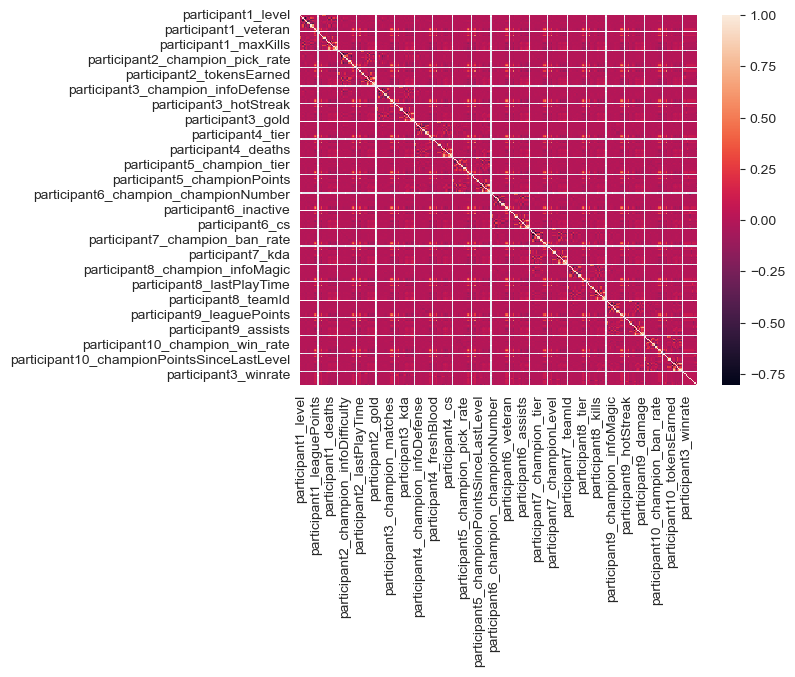

In [29]:
sns.heatmap(df.corr())

In [30]:
df_corr = df_scaled.corr().abs()

In [31]:
upper = df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

['participant1_champion_ban_rate',
 'participant1_championPointsSinceLastLevel',
 'participant2_champion_ban_rate',
 'participant2_championPointsSinceLastLevel',
 'participant3_champion_ban_rate',
 'participant3_championPointsSinceLastLevel',
 'participant4_champion_ban_rate',
 'participant4_championPointsSinceLastLevel',
 'participant5_champion_ban_rate',
 'participant5_championPointsSinceLastLevel',
 'participant6_champion_ban_rate',
 'participant6_championPointsSinceLastLevel',
 'participant7_champion_ban_rate',
 'participant7_championPointsSinceLastLevel',
 'participant8_champion_ban_rate',
 'participant8_championPointsSinceLastLevel',
 'participant9_champion_ban_rate',
 'participant9_championPointsSinceLastLevel',
 'participant10_champion_ban_rate',
 'participant10_championPointsSinceLastLevel']

In [32]:
df_drop = df.drop(to_drop, axis=1)
df_drop

,participant1_level,participant1_champion_championNumber,participant1_champion_infoAttack,participant1_champion_infoDefense,participant1_champion_infoMagic,participant1_champion_infoDifficulty,participant1_champion_tier,participant1_champion_win_rate,participant1_champion_pick_rate,participant1_champion_matches,...,participant2_winrate,participant3_winrate,participant4_winrate,participant5_winrate,participant6_winrate,participant7_winrate,participant8_winrate,participant9_winrate,participant10_winrate,label
0,988,83,6,6,4,6,2,49.86,2.2,6500,...,0.800000,0.544262,0.666667,0.512315,0.630631,0.524548,0.511364,0.522696,0.550562,1
1,121,150,6,5,5,8,2,49.75,0.4,9764,...,0.833333,0.539648,0.530172,0.576923,0.534060,0.537559,0.527559,0.588235,0.511971,1
2,739,164,8,6,3,4,5,53.02,3.0,16932,...,0.000000,0.513369,0.588235,0.510145,0.600000,0.537559,0.539648,0.527950,0.500000,1
3,841,54,5,9,7,2,5,51.50,15.2,20753,...,0.541528,0.524000,0.653846,0.511971,0.506912,0.553476,0.525275,0.468750,0.508163,1
4,766,24,7,5,7,5,0,48.49,16.8,47518,...,0.517751,0.536443,0.504360,0.562264,0.368421,0.666667,0.428571,0.583333,0.622449,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51356,513,58,8,5,2,3,3,51.60,9.4,2568,...,0.513761,0.465753,0.490909,0.498480,0.503420,0.504399,0.562500,0.388889,0.561404,1
51357,46,58,8,5,2,3,3,51.60,9.4,2568,...,0.533835,0.492918,0.500000,0.400000,0.533784,0.548701,0.505000,0.545455,0.510638,1
51358,700,166,0,0,0,0,4,51.17,6.1,8212,...,1.000000,0.546667,0.380952,0.575758,0.584795,0.546243,0.666667,0.523923,0.494350,0
51359,808,54,5,9,7,2,5,51.50,15.2,20753,...,0.522659,0.581818,0.552174,0.546154,0.538627,0.509666,0.548387,0.563953,0.567901,1


In [33]:
duplicate_rows = df_drop[df_drop.duplicated()]
duplicate_rows

,participant1_level,participant1_champion_championNumber,participant1_champion_infoAttack,participant1_champion_infoDefense,participant1_champion_infoMagic,participant1_champion_infoDifficulty,participant1_champion_tier,participant1_champion_win_rate,participant1_champion_pick_rate,participant1_champion_matches,...,participant2_winrate,participant3_winrate,participant4_winrate,participant5_winrate,participant6_winrate,participant7_winrate,participant8_winrate,participant9_winrate,participant10_winrate,label


In [34]:
zero_rows = df_drop[df_drop.eq(0).all(axis=1)]
zero_columns = df_drop.columns[df_drop.eq(0).all(axis=0)]
print(len(zero_rows))
print(zero_columns)

0
Index(['participant1_inactive', 'participant1_teamId', 'participant2_inactive',
       'participant2_teamId', 'participant3_inactive', 'participant3_teamId',
       'participant4_inactive', 'participant4_teamId', 'participant5_inactive',
       'participant5_teamId', 'participant6_inactive', 'participant7_inactive',
       'participant8_inactive', 'participant9_inactive',
       'participant10_inactive'],
      dtype='object')


In [35]:
df_drop = df_drop.drop(zero_columns, axis=1)
print(df_drop.shape)

(51283, 286)


In [17]:
df_drop.iloc[:286]

,participant1_level,participant1_champion_championNumber,participant1_champion_infoAttack,participant1_champion_infoDefense,participant1_champion_infoMagic,participant1_champion_infoDifficulty,participant1_champion_tier,participant1_champion_win_rate,participant1_champion_pick_rate,participant1_champion_matches,...,participant2_winrate,participant3_winrate,participant4_winrate,participant5_winrate,participant6_winrate,participant7_winrate,participant8_winrate,participant9_winrate,participant10_winrate,label
0,988,83,6,6,4,6,2,49.86,2.2,6500,...,0.800000,0.544262,0.666667,0.512315,0.630631,0.524548,0.511364,0.522696,0.550562,1
1,121,150,6,5,5,8,2,49.75,0.4,9764,...,0.833333,0.539648,0.530172,0.576923,0.534060,0.537559,0.527559,0.588235,0.511971,1
2,739,164,8,6,3,4,5,53.02,3.0,16932,...,0.000000,0.513369,0.588235,0.510145,0.600000,0.537559,0.539648,0.527950,0.500000,1
3,841,54,5,9,7,2,5,51.50,15.2,20753,...,0.541528,0.524000,0.653846,0.511971,0.506912,0.553476,0.525275,0.468750,0.508163,1
4,766,24,7,5,7,5,0,48.49,16.8,47518,...,0.517751,0.536443,0.504360,0.562264,0.368421,0.666667,0.428571,0.583333,0.622449,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,65,360,8,5,3,6,2,49.53,18.6,25276,...,0.520370,0.517557,0.522488,0.497748,0.672727,0.544262,0.520000,0.511688,0.508124,1
283,1172,106,7,7,4,3,2,49.30,1.0,10615,...,0.544959,0.571429,0.510040,0.564854,0.546961,0.641975,0.543478,0.522088,0.565868,1
284,892,126,8,4,3,7,0,48.81,4.5,14277,...,0.550000,0.428571,0.542169,0.490110,0.564516,0.739130,0.547231,0.518414,0.414286,1
285,280,84,5,3,8,7,0,48.84,11.8,25149,...,0.585492,0.333333,0.505495,0.522885,0.553892,0.496287,0.425532,0.523077,0.514164,0


In [18]:
def is_not_numeric(val):
    return not (isinstance(val, int) or isinstance(val, float))
non_numeric_rows = df_drop[df_drop.applymap(is_not_numeric).any(axis=1)]

In [19]:
non_numeric_rows

,participant1_level,participant1_champion_championNumber,participant1_champion_infoAttack,participant1_champion_infoDefense,participant1_champion_infoMagic,participant1_champion_infoDifficulty,participant1_champion_tier,participant1_champion_win_rate,participant1_champion_pick_rate,participant1_champion_matches,...,participant2_winrate,participant3_winrate,participant4_winrate,participant5_winrate,participant6_winrate,participant7_winrate,participant8_winrate,participant9_winrate,participant10_winrate,label


In [20]:
np.linalg.det(df_drop.iloc[:286])

/Users/admin/opt/miniconda3/envs/Leaguify/lib/python3.10/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


nan

In [21]:
mt = MCARTest(method="little")
print(mt.little_mcar_test(df_drop))

LinAlgError: Singular matrix

In [38]:
def merge_columns(df: pd.DataFrame) -> dict:
    """
    Merges columns of the form participant<x>_<col> to participants_<col>
    :param df: 
    :return: 
    """
    cols = df.columns.tolist()
    merged_columns = {}
    for col in cols:
        matches = re.search("participant(\d)_(\w+)", col)
        if matches:
            col_type = matches.group(2)
            if col_type not in merged_columns:
                merged_columns[col_type] = []
            merged_columns[col_type].append(df[col])
    merged_series = {}
    # Merge the columns of the same type into a single Pandas Series for each type
    for col_type, data_list in merged_columns.items():
        merged_series[col_type] = pd.concat(data_list, axis=1)
        # Merge all columns into a single list (flatten the DataFrame)
        merged_series[col_type] = merged_series[col_type].values.flatten()
    return merged_series

## Visualize general columns

this needs to be done upfront, as later these columns get cleaned away

In [43]:
df = df_raw.copy()

In [44]:
df['platformId']

0    BR1
0    BR1
0    BR1
0    BR1
0    BR1
    ... 
0    NA1
0    NA1
0    NA1
0    NA1
0    NA1
Name: platformId, Length: 51361, dtype: object

In [49]:
code_to_country = {
    'BR1': 'Brazil',
    'EUN1': 'Europe Nordic \& East',
    'EUW1': 'Europe West',
    'JP1': 'Japan',
    'KR': 'Korea',
    'LA1': 'Latin America North',
    'LA2': 'Latin America South',
    'NA1': 'North America',
    'OC1': 'Oceania',
    'RU': 'Russia',
    'TR1': 'Turkey'
}
df['platformId_fixed'] = df['platformId'].map(code_to_country)

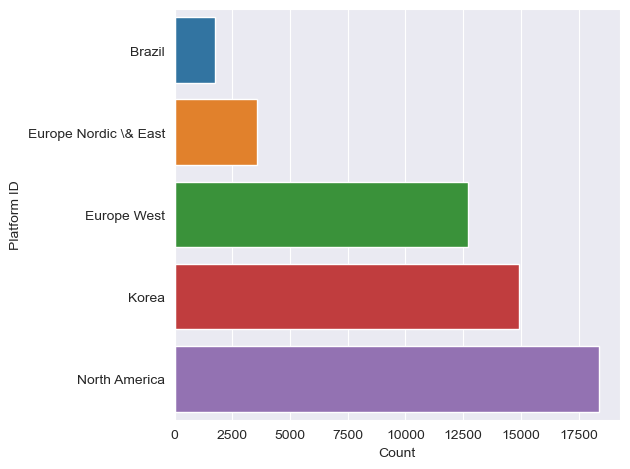

In [51]:
# plot platforId distribution
plt.figsize = (15, 8)
ax = sns.countplot(y='platformId_fixed', data=df)
ax.set(ylabel='Platform ID', xlabel='Count')
plt.tight_layout()
plt.savefig('thesis/images/platformId_distribution.pgf', bbox_inches='tight')
plt.show()

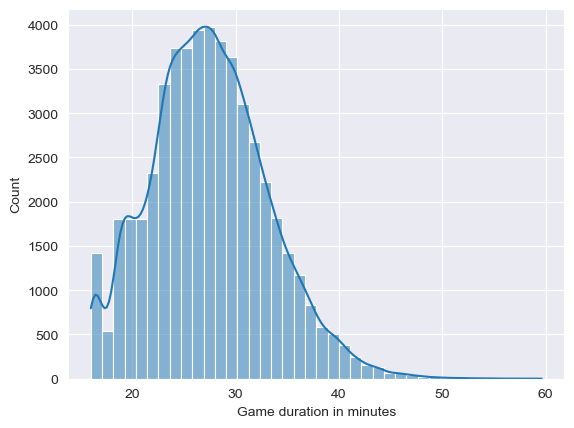

In [52]:
# plot game duration distribution
gameDurationMinutes = df['gameDuration'] / 60
ax = sns.histplot(gameDurationMinutes, bins=40, kde=True)
ax.set(xlabel='Game duration in minutes', ylabel='Count')
#plt.savefig('thesis/images/gameDuration_distribution.pgf')
plt.show()

In [53]:
res = shapiro(gameDurationMinutes.sample(50))
res

ShapiroResult(statistic=0.9563338756561279, pvalue=0.0624384768307209)

In [54]:
res = lilliefors(gameDurationMinutes[:100], dist='norm', pvalmethod='table')
res

(0.04998205901330166, 0.7807945783343234)

In [55]:
gameDurationMinutes.describe()

count    51361.000000
mean        27.502704
std          5.687885
min         16.000000
25%         23.566667
50%         27.216667
75%         31.083333
max         59.616667
Name: gameDuration, dtype: float64

In [ ]:
type(gameDurationMinutes)

In [56]:
# plot game duration distribution
sns.boxplot(data=gameDurationMinutes)


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x7fe034df8430> (for post_execute):



KeyboardInterrupt



Error in callback <function flush_figures at 0x7fe017f0f490> (for post_execute):



KeyboardInterrupt



## Visualize participant columns

In [57]:
merged = merge_columns(df)
merged.keys()

dict_keys(['level', 'champion_championNumber', 'champion_infoAttack', 'champion_infoDefense', 'champion_infoMagic', 'champion_infoDifficulty', 'champion_tier', 'champion_win_rate', 'champion_pick_rate', 'champion_ban_rate', 'champion_matches', 'tier', 'rank', 'leaguePoints', 'wins', 'losses', 'veteran', 'inactive', 'freshBlood', 'hotStreak', 'lastPlayTime', 'championLevel', 'championPoints', 'championPointsSinceLastLevel', 'tokensEarned', 'kda', 'kills', 'deaths', 'assists', 'lp', 'maxKills', 'cs', 'damage', 'gold', 'teamId', 'win'])

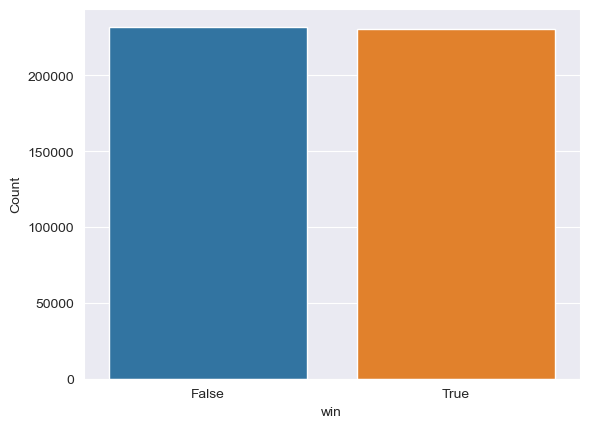

In [58]:
for key, value in merged.items():
    df_to_plot = pd.DataFrame(value)
df_to_plot.columns = [key]
ax = sns.countplot(x=key, data=df_to_plot)
ax.set(xlabel=key, ylabel='Count')
plt.show()

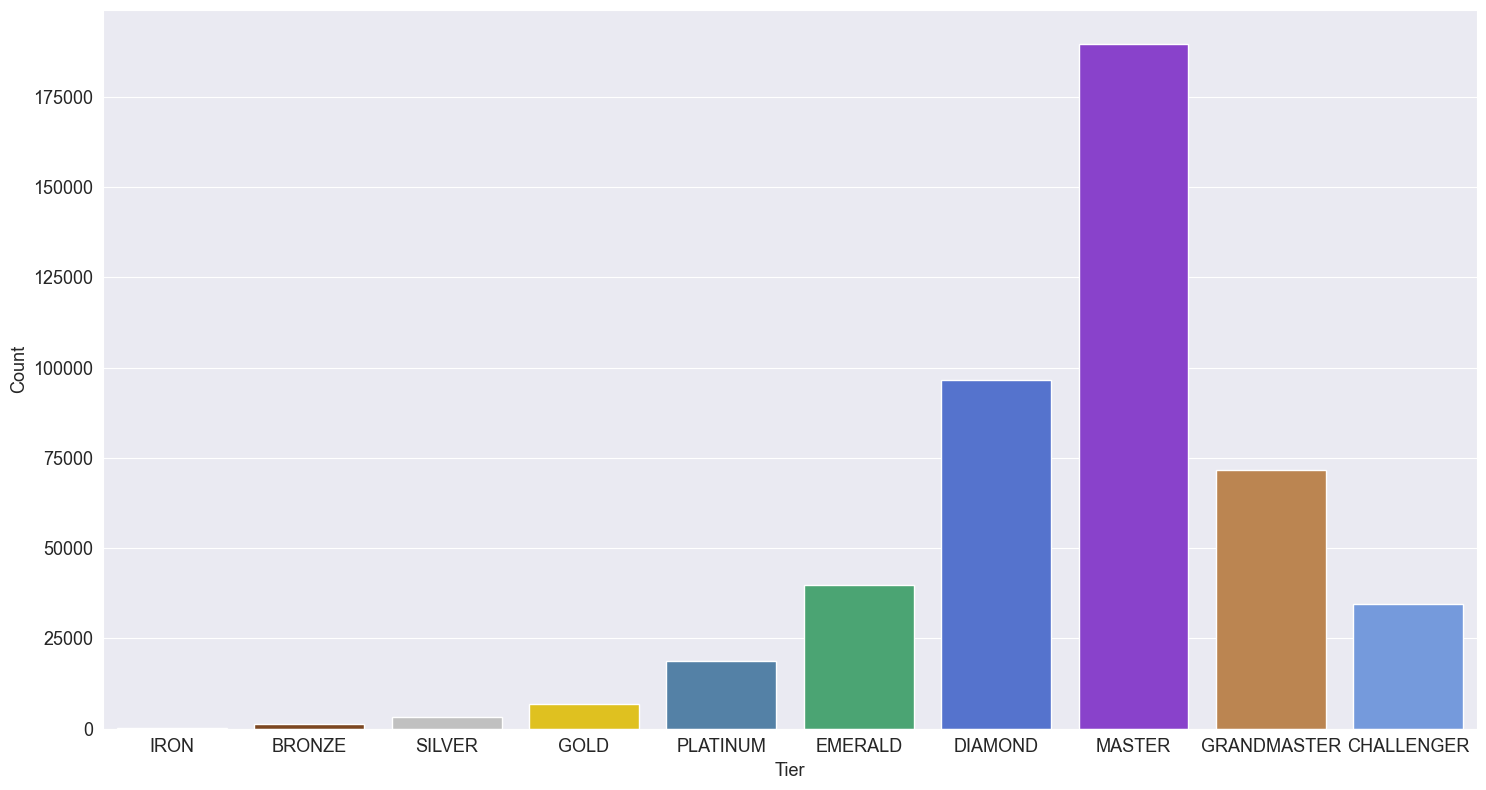

In [76]:
# TODO: change colors to match rank colors
colors = ['darkgray', 'saddlebrown', 'silver', 'gold', 'steelblue','mediumseagreen', 'royalblue', 'blueviolet', 'peru', 'cornflowerblue']

df_tier = pd.DataFrame(merged['tier'])
df_tier.columns = ['tier']
plt.figure(figsize=(15, 8))
ax = sns.countplot(df_tier, x='tier', orient='y',
                   order=['IRON', 'BRONZE', 'SILVER', 'GOLD', 'PLATINUM', 'EMERALD', 'DIAMOND', 'MASTER', 'GRANDMASTER',
                          'CHALLENGER'], palette=colors)
ax.set_xlabel('Tier', fontsize=13)
ax.set_ylabel('Count', fontsize=13)
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
plt.tight_layout()
plt.savefig('thesis/images/tier_distribution.pgf', bbox_inches='tight')

In [ ]:
df_merged.head()

## Visualize averaged team columns

In [ ]:
df_merged_ohc.head()

In [ ]:
df_merged_ohc.columns.tolist()